In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import plot_confusion_matrix
import pickle

In [189]:
#reading in cleaned and engineered data
df=pd.read_csv('final_mushroom_data.csv',index_col=0)

In [190]:
df.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-root_c,stalk-root_e,stalk-root_other,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [191]:
#defining target and features
y=df['class']
X=df.drop(['class'],axis=1)

In [257]:
#creating test/train split
#scaling not necessary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

#scaler = StandardScaler()  
#scaler.fit(X_train)

#X_train_scaled = scaler.transform(X_train)  
#X_test_scaled = scaler.transform(X_test)  

In [ ]:
#function to get best model stats after running gridsearch
#run at top of final file
def examinebestmodel(model_name):
    print(model_name.best_score_)
    print(model_name.best_params_)
    print(model_name.best_estimator_)
    
#function to print results with prediction variable
#run at top of final file
def getresults(pred_variable):
    return "F1:", metrics.f1_score(y_test,pred_variable),"Accuracy:", metrics.accuracy_score(y_test,pred_variable

### Dummy Baseline

In [307]:
#dummyclassifier for baseline
#just predicts majority class of training data
#doesn't work great and not useful bc it would leave a person sick for about half

from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train,y_train)
dummy_pred=dummy_clf.predict(X_test)

getresults(dummy_pred)
results_dict['Dummy Classifier']=getresults(dummy_pred)

### Logistic Regression

In [244]:
#logreg model
logreg=LogisticRegression()
penalty = ['l2']
c_range = [0.001, 0.01, 0.1, 1, 10]
solver=['lbfgs']
parameters_lr = dict(C=c_range, penalty=penalty,solver=solver)
lr_1=GridSearchCV(logreg,parameters_lr,scoring='accuracy',c,verbose=1)

In [259]:
#training model and predicting on test set
lr_1.fit(X_train,y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s finished


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

In [260]:
#function to get best model stats after running gridsearch
#run at top of final file

    
examinebestmodel(lr_1)

0.9995385325334564
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=10)


In [261]:
#predict on test set - logreg
y_pred_lr_1=lr_1.best_estimator_.predict(X_test)

In [263]:
getresults(y_pred_lr_1)

('F1:', 1.0, 'Accuracy:', 1.0)

In [445]:
#test

metrics.accuracy_score(y_test,y_pred_lr_1)

1.0

In [305]:
#save model results here
results_dict={}
results_dict['Log_Reg']=getresults(y_pred_lr_1)

In [227]:
results_dict

{'log_reg': ('F1:', 1.0, 'Accuracy:', 1.0)}

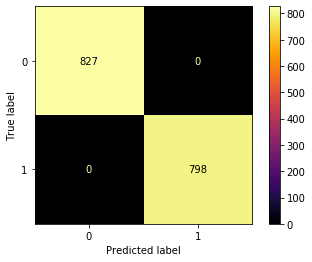

In [264]:
#confusion matrix for log reg
#one off -> false positive -> but ok for mushrooms**
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr_1.best_estimator_,X_test,y_test,cmap='inferno')
plt.show()

### KNN

In [454]:
#KNN classifier with gridsearch
knn = KNeighborsClassifier()
neighbors=[5,7]
metric=['manhattan','euclidean']
parameters_knn=dict(n_neighbors=neighbors,metric=metric)

In [455]:
gridknn=GridSearchCV(knn,parameters_knn,cv=3,verbose=1)
gridknn.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    8.6s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': [5, 7]},
             verbose=1)

In [456]:
examinebestmodel(gridknn)

0.9995385325334564
{'metric': 'manhattan', 'n_neighbors': 5}
KNeighborsClassifier(metric='manhattan')


In [457]:
y_pred_knn=gridknn.best_estimator_.predict(X_test)
getresults(y_pred_knn)

('F1:', 1.0, 'Accuracy:', 1.0)

In [308]:
results_dict['KNN']=getresults(y_pred_knn)

In [272]:
results_dict

{'log_reg': ('F1:', 1.0, 'Accuracy:', 1.0),
 'KNN': ('F1:', 1.0, 'Accuracy:', 1.0)}

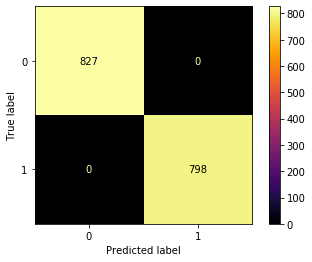

In [273]:
#confusion matrix for KNN
plot_confusion_matrix(gridknn.best_estimator_,X_test,y_test,cmap='inferno')
plt.show()

### Decision Tree

In [411]:
#Decision Tree

dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [412]:
y_pred_train=dtc.predict(X_train)
y_pred_test_tree=dtc.predict(X_test)

In [413]:
print("Acc Score:",metrics.accuracy_score(y_train, y_pred_train))
print("Acc Score:",metrics.accuracy_score(y_test, y_pred_test_tree))

Acc Score: 1.0
Acc Score: 1.0


In [282]:
getresults(y_pred_test_tree)

('F1:', 1.0, 'Accuracy:', 1.0)

DecisionTreeClassifier()

In [309]:
results_dict['Decision Tree']=getresults(y_pred_test_tree)

In [310]:
results_dict

{'Log_Reg': ('F1:', 1.0, 'Accuracy:', 1.0),
 'Dummy Classifier': ('F1:', 0.0, 'Accuracy:', 0.5089230769230769),
 'KNN': ('F1:', 1.0, 'Accuracy:', 1.0),
 'Decision Tree': ('F1:', 1.0, 'Accuracy:', 1.0)}

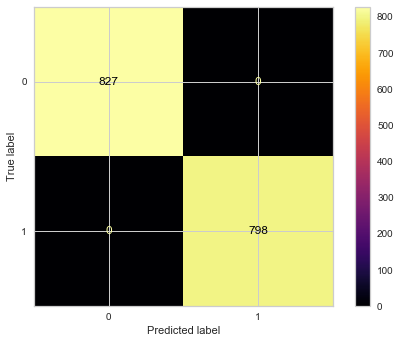

In [414]:
#confusion matrix for DTC
plot_confusion_matrix(dtc,X_test,y_test,cmap='inferno')
plt.show()

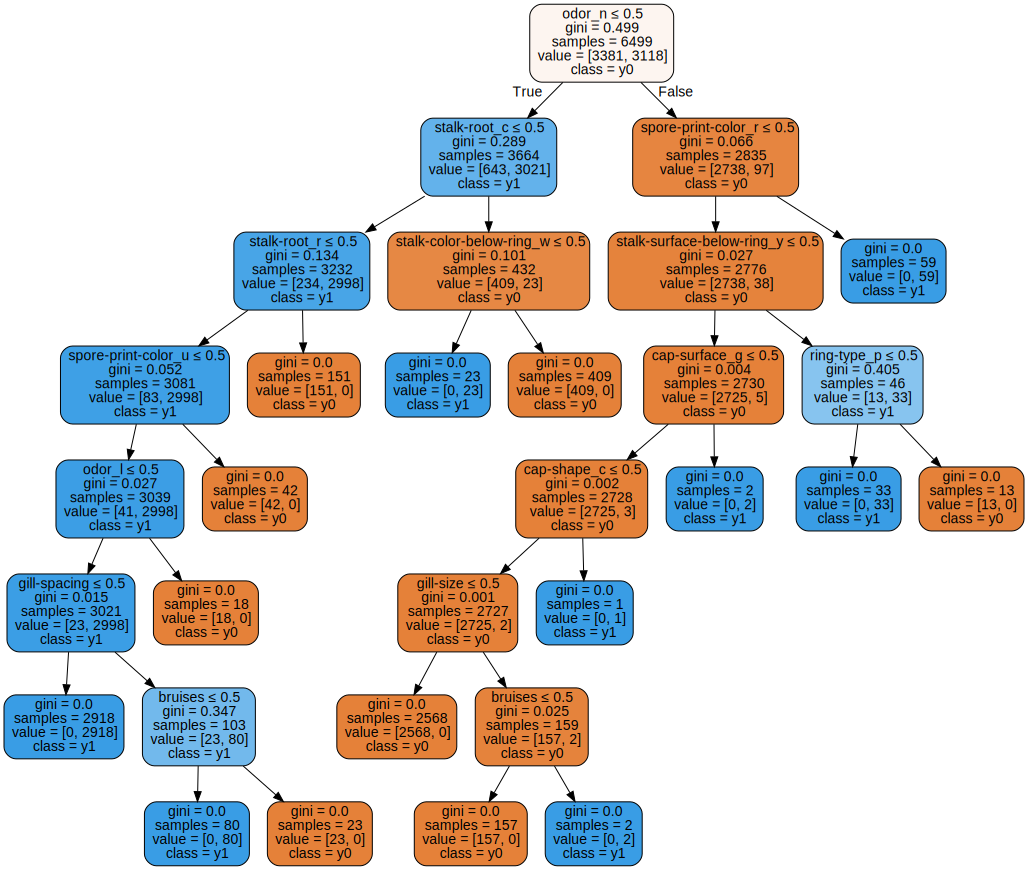

In [458]:
#visualization of decision tree classifier 
#odor_n largest split


import graphviz

dot_data=tree.export_graphviz(dtc,out_file=None,feature_names = list(X.columns),class_names=True, filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

In [459]:
tree

<module 'sklearn.tree' from '/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/__init__.py'>

In [416]:
# DTC with gridsearch
dtc2= DecisionTreeClassifier(random_state=1)
param_grid={'max_depth': [1,11,15],
            'min_samples_leaf': [2,10,30],
            'splitter': ['best','random'],
            'criterion':['gini','entropy']}
grid_tree_2=GridSearchCV(dtc2, param_grid, cv=3)                                 

In [417]:
grid_tree_2.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 11, 15],
                         'min_samples_leaf': [2, 10, 30],
                         'splitter': ['best', 'random']})

In [418]:
examinebestmodel(grid_tree_2)

0.9995385325334564
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 2, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=11, min_samples_leaf=2, random_state=1)


In [419]:
y_pred_gridtree=grid_tree_2.best_estimator_.predict(X_test)

In [420]:
getresults(y_pred_gridtree)

('F1:', 1.0, 'Accuracy:', 1.0)

In [421]:
results_dict['DTC_Grid']=getresults(y_pred_gridtree)

In [422]:
#feature importance scores
#Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

importance=dtc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.01223
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00306
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00062
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00123
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.01086
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.61541
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

In [339]:
col_names=list(X.columns)

In [407]:
col_names[27] #test

'odor_n'

In [423]:
#feature importance using base DTC
important_features_dict = {}
for x,i in enumerate(dtc.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print ('Most important features: %s' %important_features_list)

Most important features: [27, 42, 45, 79, 80, 51, 66, 0, 25, 74, 2, 11, 6, 3, 1, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]


In [424]:
#feature names in descending order of importance for base DTC
most_important=[]
for ele in important_features_list:
    most_important.append(col_names[ele])

In [425]:
#top ten per DTC
most_important[0:10]

['odor_n',
 'stalk-root_c',
 'stalk-root_r',
 'spore-print-color_r',
 'spore-print-color_u',
 'stalk-surface-below-ring_y',
 'stalk-color-below-ring_w',
 'bruises',
 'odor_l',
 'ring-type_p']

In [428]:
#feat_importances is a dataframe #use dtc grid model
feat_importanceDF = pd.DataFrame(grid_tree_2.best_estimator_.feature_importances_,index=X.columns)
feat_importanceDF.sort_values(by=0,ascending=False).head(10)

,0
odor_n,0.615409
stalk-root_c,0.179599
stalk-surface-below-ring_y,0.098303
spore-print-color_r,0.034647
spore-print-color_u,0.024855
stalk-color-above-ring_c,0.013424
odor_c,0.011013
odor_l,0.010864
stalk-color-above-ring_n,0.005749
gill-spacing,0.003058


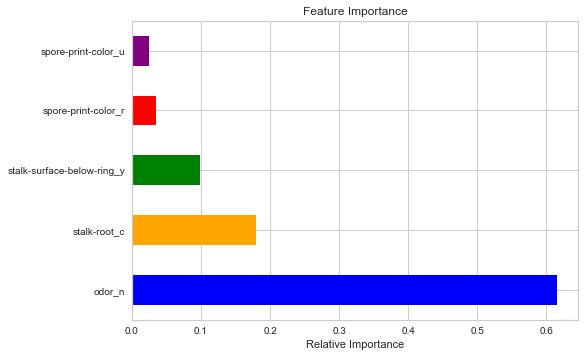

In [429]:
feat_importances = pd.Series(grid_tree_2.best_estimator_.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh',color=['blue','orange','green','red','purple'])
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.show()

In [433]:
X['odor_n'].value_counts()

0    4596
1    3528
Name: odor_n, dtype: int64

0    4208
1    3916
Name: class, dtype: int64